In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

# Create training and test sets.
#offset = int(X.shape[0] * 0.8)

# Put 90% of the data in the training set.
#X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
#X_test, y_test = X[offset:], y[offset:]

In [3]:
df.columns

Index(['cntry', 'idno', 'year', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp',
       'happy', 'sclmeet', 'sclact', 'gndr', 'agea', 'partner'],
      dtype='object')

In [4]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(x_train, y_train)

predict_train = clf.predict(x_train)
predict_test = clf.predict(x_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0, 1] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1 , 0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0, 1]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1, 0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.046493785484118456
Percent Type II errors: 0.1727788859904864

Test set accuracy:
Percent Type I errors: 0.06687116564417178
Percent Type II errors: 0.17914110429447852


In [5]:
table_train

col_0,0.0,1.0,All
partner,,,
0.0,3700,303,4003
1.0,1126,1388,2514
All,4826,1691,6517


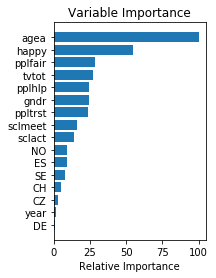

In [6]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [7]:
sorted_idx

array([12,  0, 11, 10, 15, 13, 14,  7,  6,  2,  8,  4,  1,  3,  5,  9],
      dtype=int64)

# Challenge 

Make it better. 

The only things we have to work with are the features (columns of X, our input), and the parameters for our model. Both of which are listed below.

In [8]:
print(X.columns, '\n'*2, clf.get_params())

Index(['year', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet',
       'sclact', 'gndr', 'agea', 'CH', 'CZ', 'DE', 'ES', 'NO', 'SE'],
      dtype='object') 

 {'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'presort': 'auto', 'random_state': None, 'subsample': 1.0, 'verbose': 0, 'warm_start': False}


- Applying more overfitting-prevention strategies like subsampling
- More iterations
- Trying a different loss function
- Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

gradient boosting with trees (sklearn gradientboosting) continuous params:
- learning_rate
- max_depth
- max_features?
- max_leaf_nodes?
- min_impurity_decrease/min_impurity_split/min_samples_leaf/min_samples_split/min_weight/fraction_leaf
- n_estimators
- subsample?

In [9]:
print(X.shape)
x_corrs = X.corr().abs()

x_upper = x_corrs.where(np.triu(np.ones(x_corrs.shape), k=1).astype(bool))
highly_corred = [column for column in x_upper.columns if any(x_upper[column] > .90)]

X.drop(highly_corred, axis=1)
print(X.shape)

(8147, 16)
(8147, 16)


In [10]:
'''#let's just do a gridsearch to optimize the gradient boost classifier
from sklearn.model_selection import GridSearchCV
params = {
    'learning_rate' : [.1, .5, .9],
    'max_depth' : [1, 3, 5],
    'max_features' : ['auto','log2', 3, None],
    'n_estimators' : [100, 300, 500, 1000, 2000],
    'subsample' : [.1, .5, .9]
}

gridsearch = GridSearchCV(clf, params, cv=3, scoring='r2')

gridsearch.fit(x_train, y_train)'''

"#let's just do a gridsearch to optimize the gradient boost classifier\nfrom sklearn.model_selection import GridSearchCV\nparams = {\n    'learning_rate' : [.1, .5, .9],\n    'max_depth' : [1, 3, 5],\n    'max_features' : ['auto','log2', 3, None],\n    'n_estimators' : [100, 300, 500, 1000, 2000],\n    'subsample' : [.1, .5, .9]\n}\n\ngridsearch = GridSearchCV(clf, params, cv=3, scoring='r2')\n\ngridsearch.fit(x_train, y_train)"

In [12]:
#print(str(gridsearch.best_params_))
bestparams = {
    'learning_rate' : .1,
    'max_depth' : 3,
    'max_features' : None,
    'n_estimators' : 100,
    'subsample' : .9,
}
bestparams2 = {
    'learning_rate' : .1,
    'max_depth' : 3,
    'max_features' : None,
    'n_estimators' : 100,
    'subsample' : .9,
    'loss' : 'exponential'
}

In [13]:
clf.set_params(**bestparams2)

clf.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=0.9, verbose=0,
              warm_start=False)

In [15]:
predict_train = clf.predict(x_train)
predict_test = clf.predict(x_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0, 1] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1 , 0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0, 1]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1, 0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04327144391591223
Percent Type II errors: 0.18045112781954886

Test set accuracy:
Percent Type I errors: 0.05460122699386503
Percent Type II errors: 0.18650306748466258


The R^2 of the optimized model was only very slightly better than the old model. The exponential loss function seemed to 
improve the score as well. The newer model improved the amount of false positives (Type 1 errors), but also increased the number of false negatives (Type 2 errors).

# Original Model
Training set accuracy:
Percent Type I errors: 0.046493785484118456
Percent Type II errors: 0.1727788859904864

Test set accuracy:
Percent Type I errors: 0.06687116564417178
Percent Type II errors: 0.17914110429447852

# New Model
Training set accuracy:
Percent Type I errors: 0.04327144391591223
Percent Type II errors: 0.18045112781954886

Test set accuracy:
Percent Type I errors: 0.05460122699386503
Percent Type II errors: 0.18650306748466258